<a href="https://colab.research.google.com/github/sky-m1618/PROJECT_1/blob/main/P1_text_emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import pandas as pd
import numpy as np
import keras
import tensorflow
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv('train.txt',sep = ';')
df.columns = ['Text','Emotion']
print(df.head())
print(df.shape)

                                                Text  Emotion
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness
(15999, 2)


In [7]:
texts = df.Text.tolist()
emotions = df.Emotion.tolist()

In [8]:
type(texts)

list

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [11]:
seq = tokenizer.texts_to_sequences(texts)
max_len = max([len(s) for s in seq])
padded_seq = pad_sequences(seq , maxlen = max_len)

In [12]:
padded_seq

array([[   0,    0,    0, ...,    3,   21, 1254],
       [   0,    0,    0, ...,    2,  494,  437],
       [   0,    0,    0, ...,   29,    5, 3496],
       ...,
       [   0,    0,    0, ...,    3,  101, 1331],
       [   0,    0,    0, ...,  339,    8,   42],
       [   0,    0,    0, ...,   25, 3585,   12]], dtype=int32)

In [14]:
le = LabelEncoder()
lables = le.fit_transform(emotions)

In [15]:
lables

array([4, 0, 3, ..., 2, 0, 4])

In [16]:
one_hot_lables = keras.utils.to_categorical(lables)

In [17]:
one_hot_lables

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [20]:
X_train,X_test , y_train ,y_test = train_test_split(padded_seq , one_hot_lables, test_size = 0.2)

**Define The Model**

In [21]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Embedding


In [23]:
model = Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index)+1 , output_dim = 128 , input_length = max_len))
model.add(Flatten())

model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = len(one_hot_lables[0]) , activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train , epochs = 7 , batch_size=32, validation_data = (X_test ,y_test))

Epoch 1/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.3579 - loss: 1.5437 - val_accuracy: 0.6850 - val_loss: 0.9543
Epoch 2/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8432 - loss: 0.5160 - val_accuracy: 0.8166 - val_loss: 0.5363
Epoch 3/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9836 - loss: 0.0671 - val_accuracy: 0.8313 - val_loss: 0.5555
Epoch 4/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9953 - loss: 0.0218 - val_accuracy: 0.8309 - val_loss: 0.5853
Epoch 5/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9965 - loss: 0.0193 - val_accuracy: 0.8306 - val_loss: 0.5951
Epoch 6/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9974 - loss: 0.0146 - val_accuracy: 0.8163 - val_loss: 0.6567
Epoch 7/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9976 - loss: 0.0111 - val_accuracy: 0.8178 - val_loss: 0.7173


In [36]:
input_text = "she love me"
input_seq = tokenizer.texts_to_sequences(input_text)
padded_sequence = pad_sequences(input_seq,maxlen = max_len)
pred = model.predict(padded_sequence)
print(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[0.5459341  0.03587418 0.04458026 0.00607928 0.34833315 0.01919895]


In [37]:
output = le.inverse_transform([np.argmax(pred[0])])
print(output)
print(output[0])

['anger']
anger


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 66, 128)        │     1,947,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8448)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,081,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,088,532 (34.67 MB)

 Trainable params: 3,029,510 (11.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,059,022 (23.11 MB)

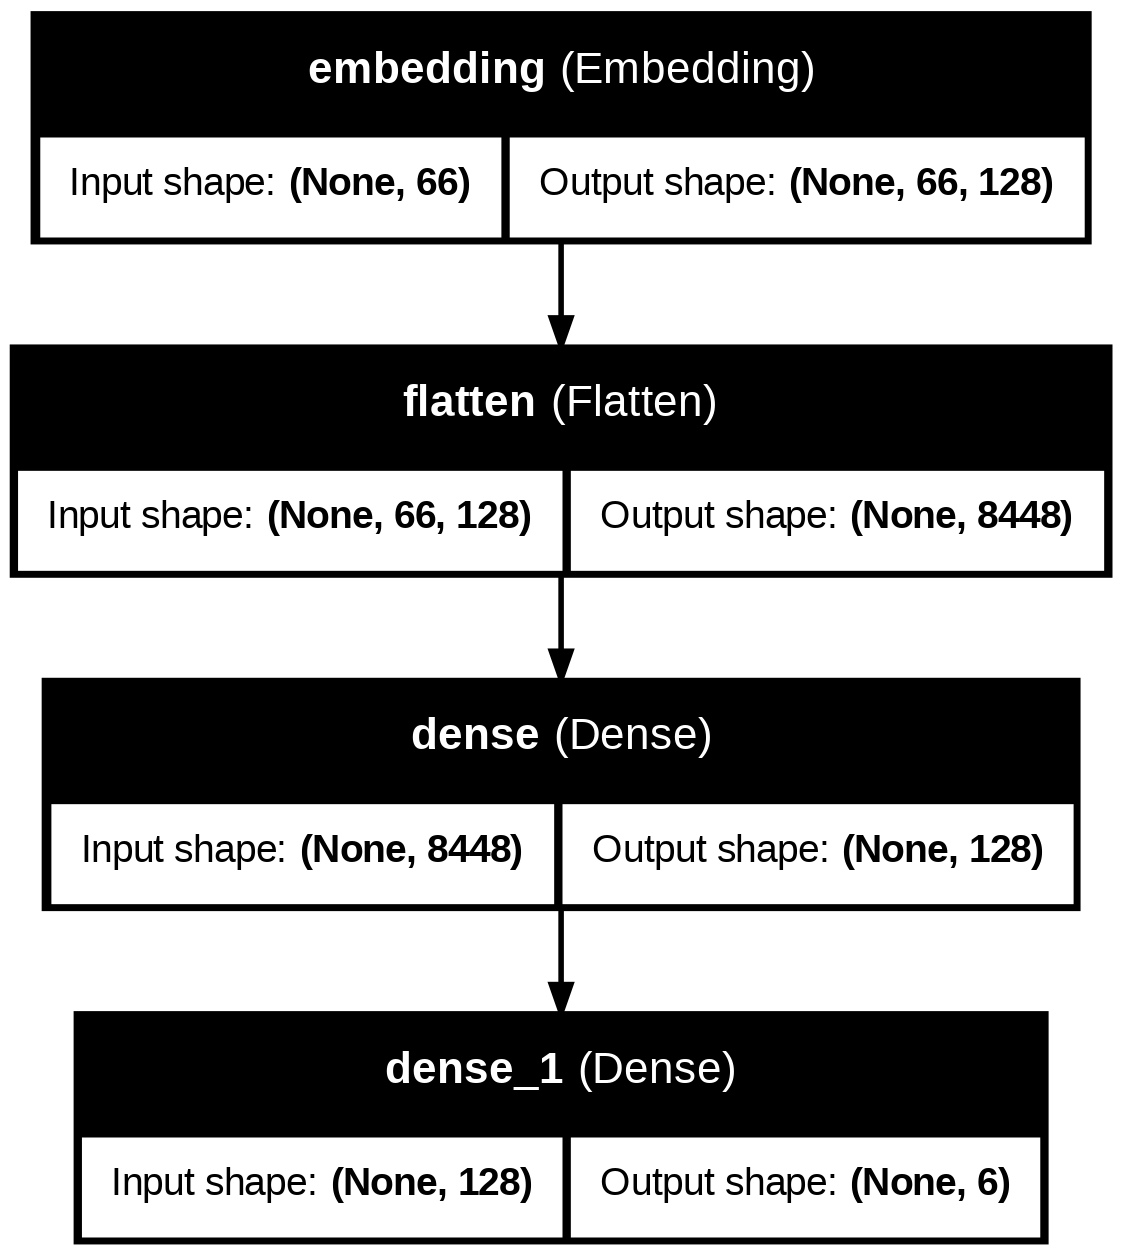

In [40]:
from keras.utils import plot_model
plot_model(model , to_file = 'model_plot.png' , show_shapes=True, show_layer_names=True)